In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import HTML, display
import seaborn as sns; sns.set()
from wordcloud import WordCloud

In [3]:
df=pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.shape

(319795, 18)

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [7]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [8]:
print("Race:", df['Race'].unique().tolist())
print("General Health:", df['GenHealth'].unique().tolist())

Race: ['White', 'Black', 'Asian', 'American Indian/Alaskan Native', 'Other', 'Hispanic']
General Health: ['Very good', 'Fair', 'Good', 'Poor', 'Excellent']


In [9]:
print(df['SleepTime'].describe(percentiles=[.25, .50, .75, .95]))

count    319795.000000
mean          7.097075
std           1.436007
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
95%           9.000000
max          24.000000
Name: SleepTime, dtype: float64


In [10]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [11]:
# We noted that the GenHealth is of 5 category
df['GenHealth'].value_counts()

GenHealth
Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: count, dtype: int64

<Axes: ylabel='count'>

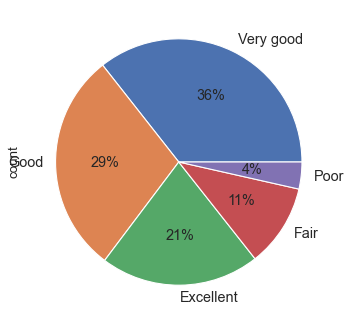

In [12]:
fig = plt.figure(figsize=(5,5), dpi=80)
df['GenHealth'].value_counts().plot(kind='pie', autopct='%1.0f%%', startangle=360, fontsize=13)

In [13]:
# There are 5 categories in the Race variable
df['Race'].value_counts()

Race
White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: count, dtype: int64

In [14]:
df.duplicated().sum()

18078

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(301717, 18)

In [17]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


In [18]:
count_target = df['HeartDisease'].value_counts()
count_target

HeartDisease
No     274456
Yes     27261
Name: count, dtype: int64

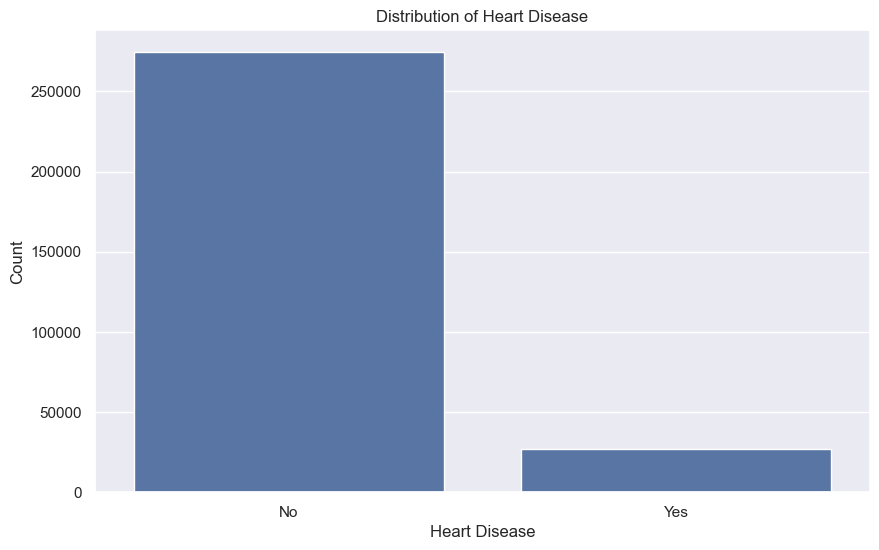

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x=count_target.index, y=count_target.values)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

In [20]:
df['PhysicalHealth'].unique()

array([ 3.,  0., 20., 28.,  6., 15.,  5., 30.,  7.,  1.,  2., 21.,  4.,
       10., 14., 18.,  8., 25., 16., 29., 27., 17., 24., 12., 23., 26.,
       22., 19.,  9., 13., 11.])

In [21]:
df['MentalHealth'].unique()

array([30.,  0.,  2.,  5., 15.,  8.,  4.,  3., 10., 14., 20.,  1.,  7.,
       24.,  9., 28., 16., 12.,  6., 25., 17., 18., 21., 29., 22., 13.,
       23., 27., 26., 11., 19.])

In [22]:
df['BMI'].unique()

array([16.6 , 20.34, 26.58, ..., 62.42, 51.46, 46.56])

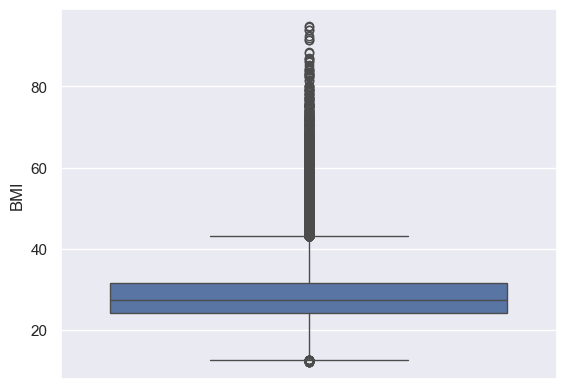

In [23]:
sns.boxplot(df['BMI'])
plt.show()

In [24]:
df['AgeCategory'].value_counts().iloc[:5]

AgeCategory
65-69    31670
60-64    31219
70-74    29273
55-59    27610
50-54    23736
Name: count, dtype: int64

Text(0.5, 1.0, 'Race Distribution')

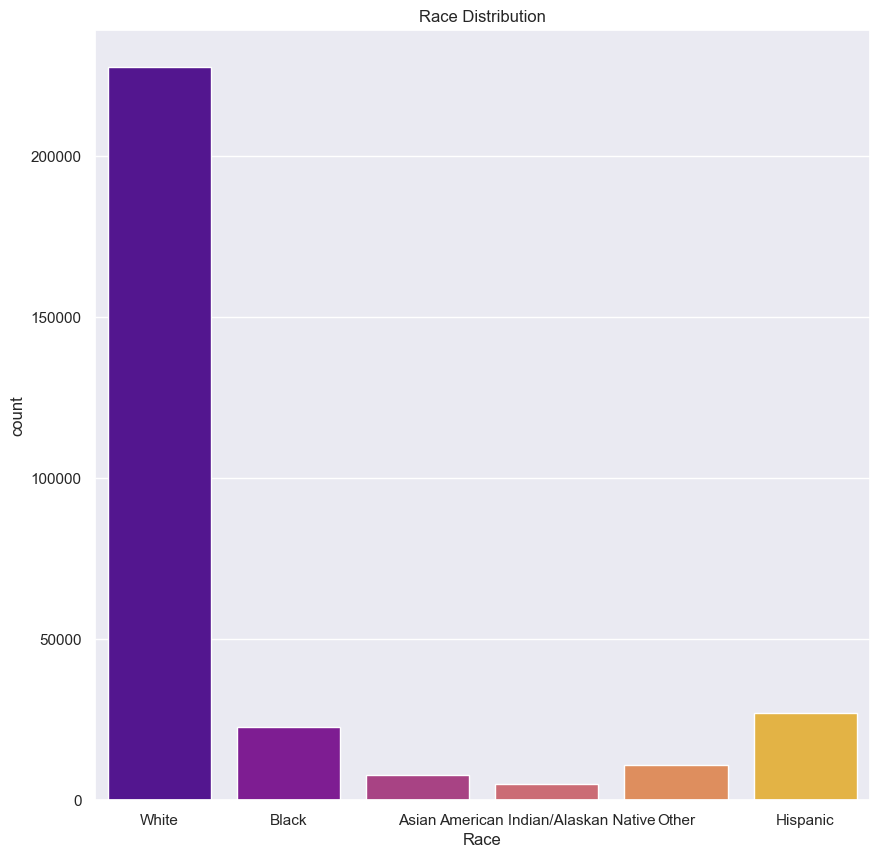

In [25]:
sns.countplot(x='Race', hue='Race', data=df, palette='plasma', legend=False)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Race Distribution')
        

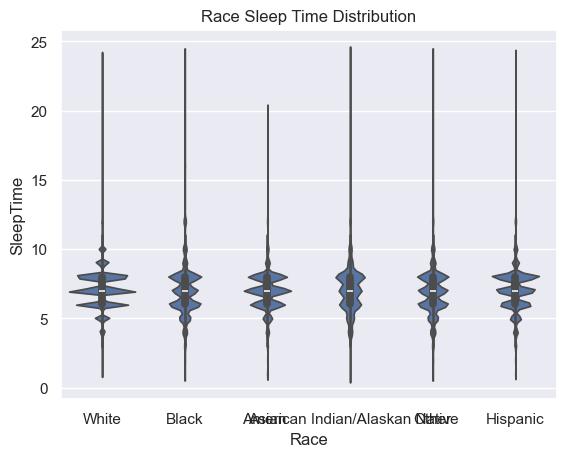

In [26]:
SleepTime_df = df[df.SleepTime <= 24]
viz_2 = sns.violinplot(data=SleepTime_df, x='Race', y='SleepTime')
viz_2.set_title('Race Sleep Time Distribution')
plt.show()

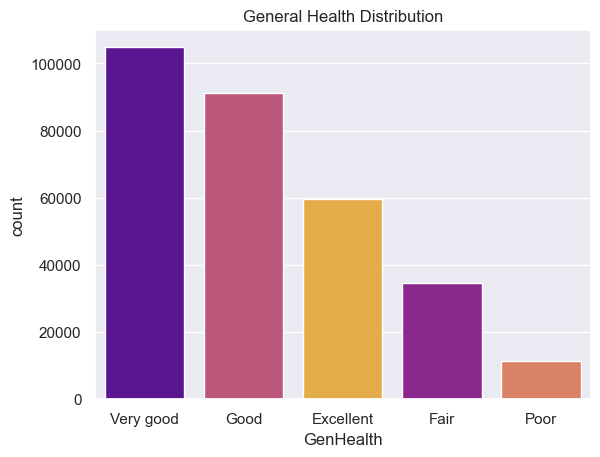

In [27]:
ax = sns.countplot(x='GenHealth', hue='GenHealth', data=df, 
                   order=df['GenHealth'].value_counts().index, 
                   palette='plasma', legend=False)
ax.set_title('General Health Distribution')
plt.show()

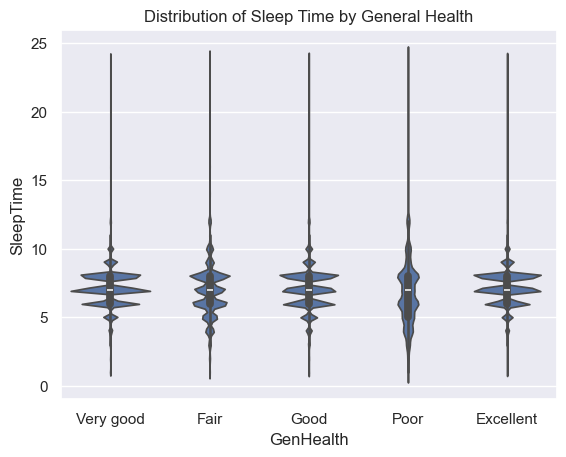

In [28]:
viz_2=sns.violinplot(data=SleepTime_df, x='GenHealth', y='SleepTime')
viz_2.set_title('Distribution of Sleep Time by General Health')
plt.show()

In [29]:
def remove_outliers_from_dataframe(df):
    
    for column in df.columns:
        if column in ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
        
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
        
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [30]:
df=remove_outliers_from_dataframe(df)

In [31]:
bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]  
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III']

In [32]:
df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)

In [33]:
df[['BMI', 'BMI_Category']].head(10)

,BMI,BMI_Category
1,20.34,Normal weight
3,24.21,Normal weight
7,31.64,Obesity I
8,26.45,Overweight
9,40.69,Obesity III
11,28.71,Overweight
12,28.37,Overweight
15,29.18,Overweight
16,26.26,Overweight
18,29.86,Overweight


In [34]:
df['BMI_Category'].value_counts()

BMI_Category
Overweight       79806
Normal weight    66192
Obesity I        42928
Obesity II       17035
Obesity III       4722
Underweight       3273
Name: count, dtype: int64

C:\Users\nanaf\Downloads\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


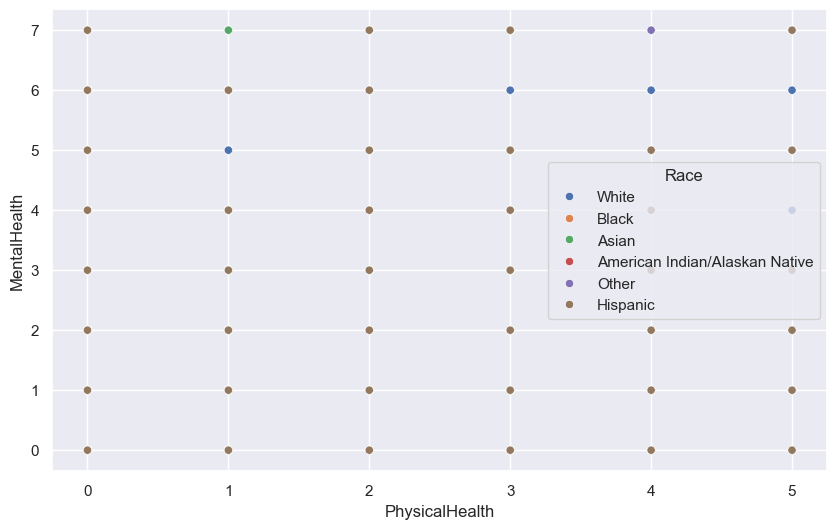

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PhysicalHealth', y='MentalHealth', hue='Race', data=df)
plt.ioff()
plt.show()

C:\Users\nanaf\Downloads\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


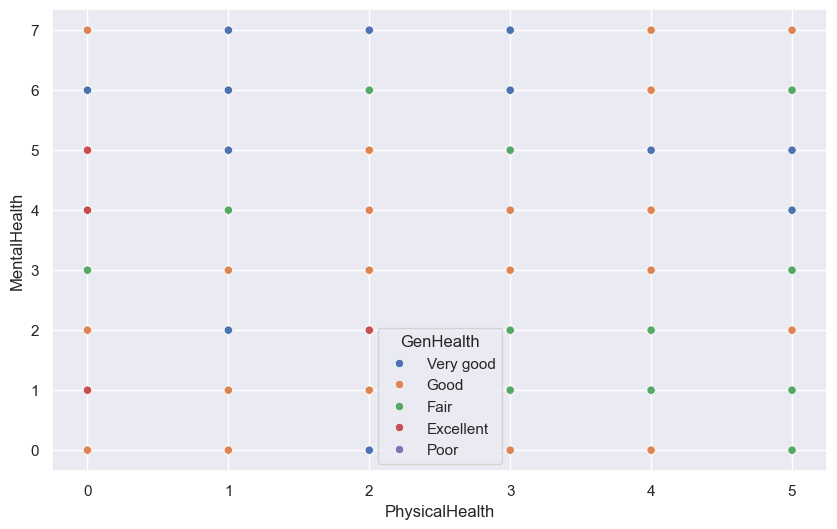

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PhysicalHealth', y='MentalHealth', hue='GenHealth', data=df)
plt.ioff()
plt.show()

C:\Users\nanaf\AppData\Local\Temp\ipykernel_19844\3202609849.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='BMI_Category', data=df_heart_disease, palette='Spectral')


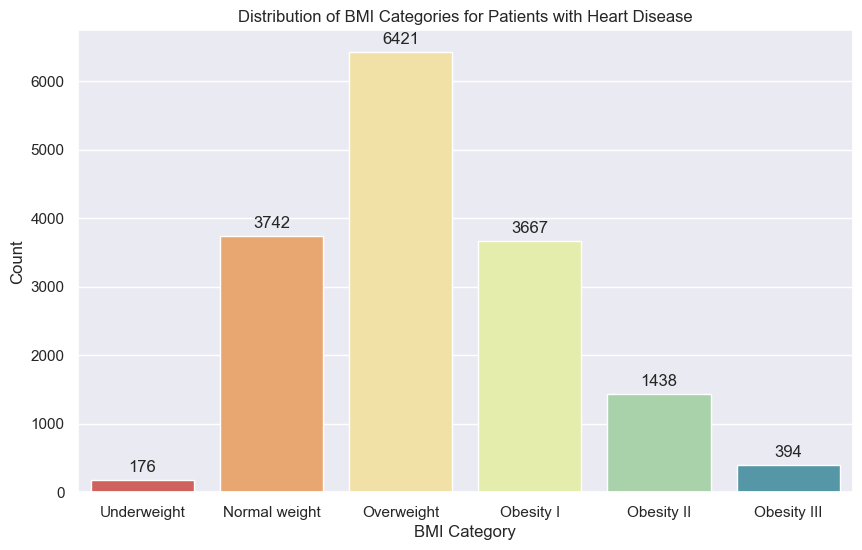

In [37]:
df_heart_disease = df[df['HeartDisease'] == 'Yes']

plt.figure(figsize=(10,6))
ax = sns.countplot(x='BMI_Category', data=df_heart_disease, palette='Spectral')  
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9),  
                textcoords='offset points')

plt.title('Distribution of BMI Categories for Patients with Heart Disease')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

C:\Users\nanaf\AppData\Local\Temp\ipykernel_19844\1764042520.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='AgeCategory', data=df_heart_disease, palette='flare')


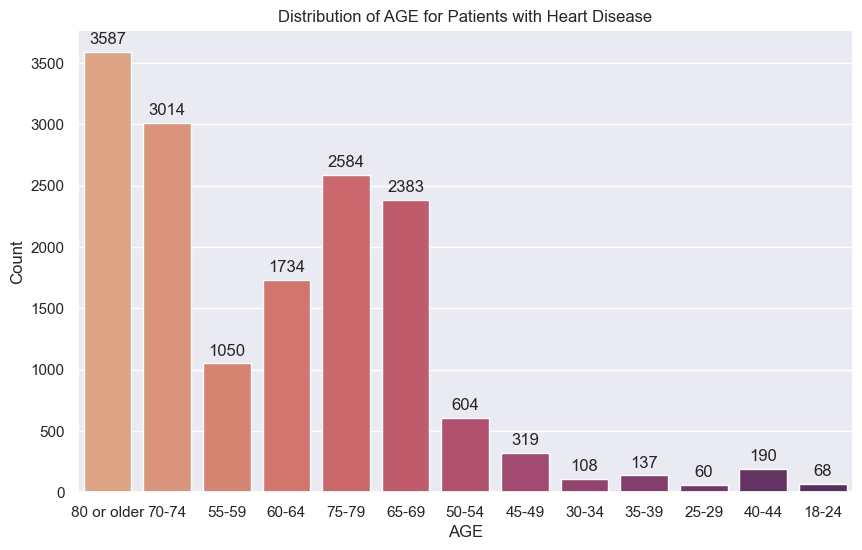

In [38]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='AgeCategory', data=df_heart_disease, palette='flare')  
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9),  
                textcoords='offset points')

plt.title('Distribution of AGE for Patients with Heart Disease')
plt.xlabel('AGE')
plt.ylabel('Count')
plt.show()

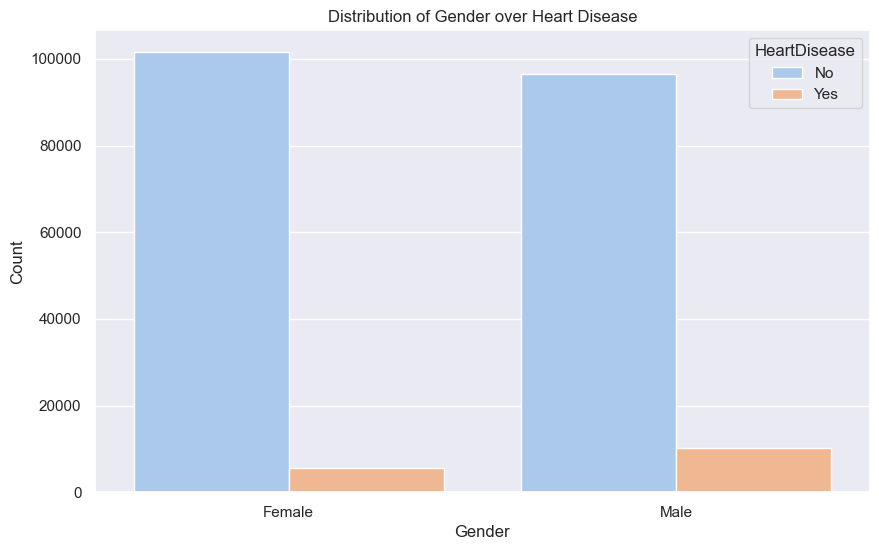

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sex',hue='HeartDisease',data =df,palette='pastel')
plt.title('Distribution of Gender over Heart Disease')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

C:\Users\nanaf\AppData\Local\Temp\ipykernel_19844\1995689614.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='GenHealth', data=df_heart_disease, palette='ch:s=.25,rot=-.25')


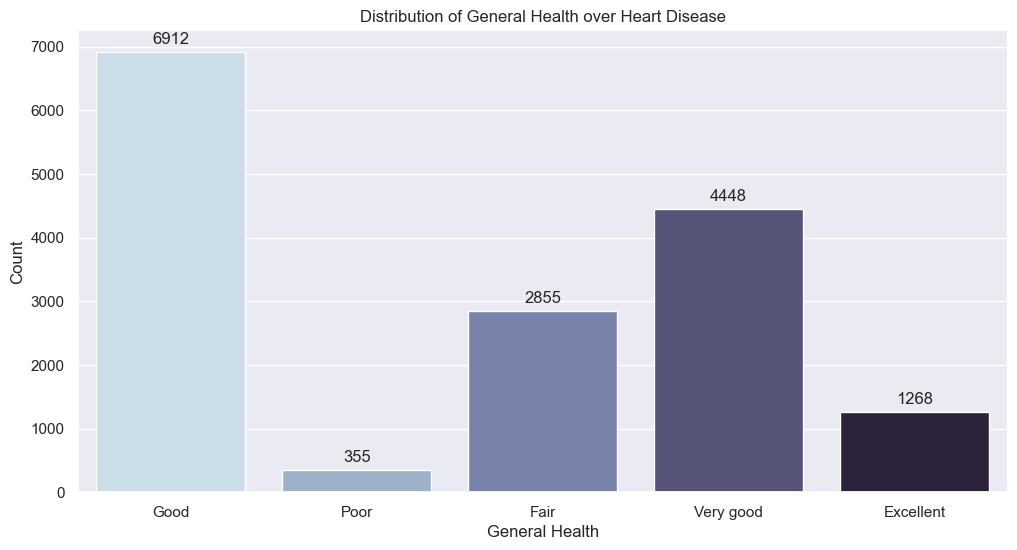

In [40]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='GenHealth', data=df_heart_disease, palette='ch:s=.25,rot=-.25') 
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9),  
                textcoords='offset points')
plt.title('Distribution of General Health over Heart Disease')
plt.xlabel('General Health')
plt.ylabel('Count')
plt.show()

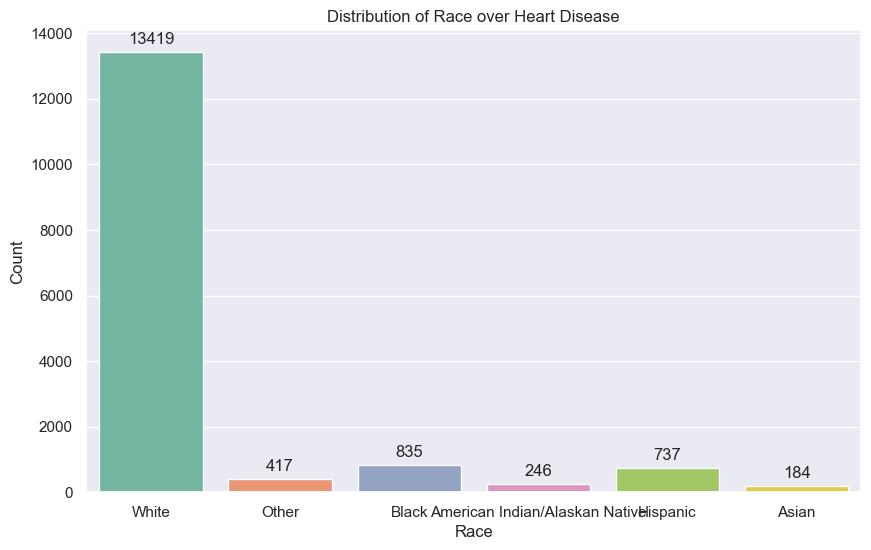

In [41]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Race', hue='Race', data=df_heart_disease, palette='Set2', legend=False)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9),  
                textcoords='offset points')
plt.title('Distribution of Race over Heart Disease')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213956 entries, 1 to 319792
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   HeartDisease      213956 non-null  object  
 1   BMI               213956 non-null  float64 
 2   Smoking           213956 non-null  object  
 3   AlcoholDrinking   213956 non-null  object  
 4   Stroke            213956 non-null  object  
 5   PhysicalHealth    213956 non-null  float64 
 6   MentalHealth      213956 non-null  float64 
 7   DiffWalking       213956 non-null  object  
 8   Sex               213956 non-null  object  
 9   AgeCategory       213956 non-null  object  
 10  Race              213956 non-null  object  
 11  Diabetic          213956 non-null  object  
 12  PhysicalActivity  213956 non-null  object  
 13  GenHealth         213956 non-null  object  
 14  SleepTime         213956 non-null  float64 
 15  Asthma            213956 non-null  object  
 16  KidneyD

In [43]:
df['Diabetic'].value_counts()

Diabetic
No                         183353
Yes                         24317
No, borderline diabetes      4586
Yes (during pregnancy)       1700
Name: count, dtype: int64

In [44]:
df['Diabetic'] = df['Diabetic'].replace({
    'No, borderline diabetes': 'No',
    'Yes (during pregnancy)': 'Yes'
})

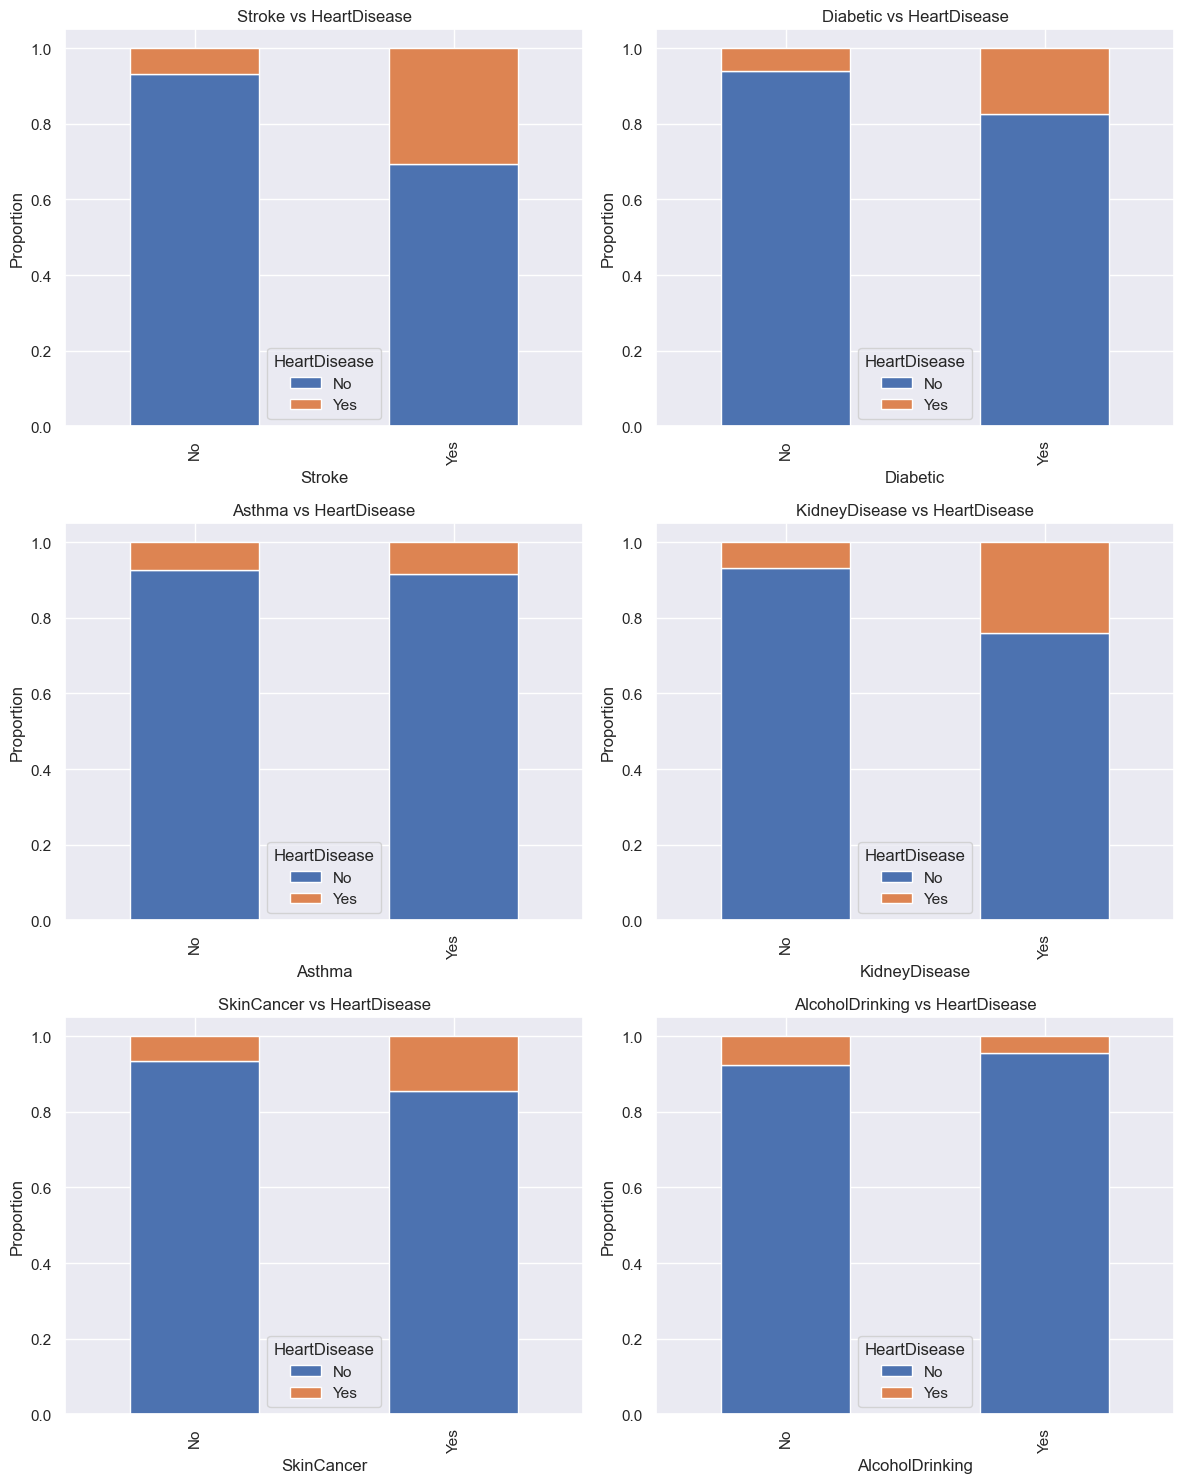

In [45]:
def stacked_bar(data, feature, target, ax):
    crosstab = pd.crosstab(data[feature], data[target], normalize='index')
    crosstab.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'{feature} vs {target}')
    ax.set_ylabel('Proportion')

# Set up the figure
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

# Plot each feature
stacked_bar(df, 'Stroke', 'HeartDisease', axes[0, 0])
stacked_bar(df, 'Diabetic', 'HeartDisease', axes[0, 1])
stacked_bar(df, 'Asthma', 'HeartDisease', axes[1, 0])
stacked_bar(df, 'KidneyDisease', 'HeartDisease', axes[1, 1])
stacked_bar(df, 'SkinCancer', 'HeartDisease', axes[2, 0])
stacked_bar(df, 'AlcoholDrinking', 'HeartDisease', axes[2, 1])


# Adjust layout
plt.tight_layout()
plt.show()

In [46]:
df['SleepTime'].value_counts()

SleepTime
7.0     69750
8.0     69644
6.0     43557
9.0     11693
5.0     10505
10.0     4738
4.0      3170
3.0       681
11.0      218
Name: count, dtype: int64

C:\Users\nanaf\AppData\Local\Temp\ipykernel_19844\738874149.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y='SleepTime', data=df, palette='Set2')


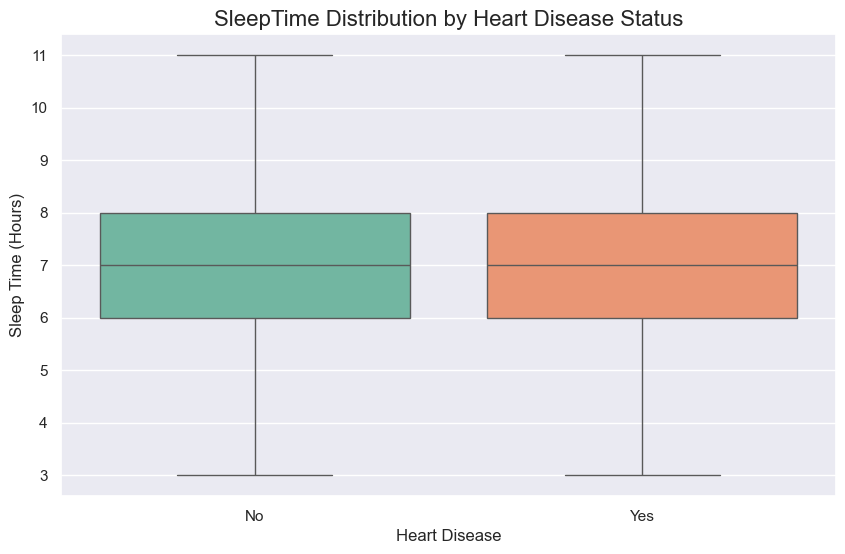

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDisease', y='SleepTime', data=df, palette='Set2')
plt.title('SleepTime Distribution by Heart Disease Status', fontsize=16)
plt.xlabel('Heart Disease', fontsize=12)
plt.ylabel('Sleep Time (Hours)', fontsize=12)

plt.show()

In [48]:
df[['PhysicalHealth','MentalHealth']].describe()

,PhysicalHealth,MentalHealth
count,213956.000000,213956.00000
mean,0.420937,0.81306
std,1.098286,1.68923
min,0.000000,0.00000
25%,0.000000,0.00000
50%,0.000000,0.00000
75%,0.000000,0.00000
max,5.000000,7.00000


C:\Users\nanaf\AppData\Local\Temp\ipykernel_19844\4200294747.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='HeartDisease', y='PhysicalHealth', data=df, palette='Set2')
C:\Users\nanaf\AppData\Local\Temp\ipykernel_19844\4200294747.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='HeartDisease', y='MentalHealth', data=df, palette='Set3')


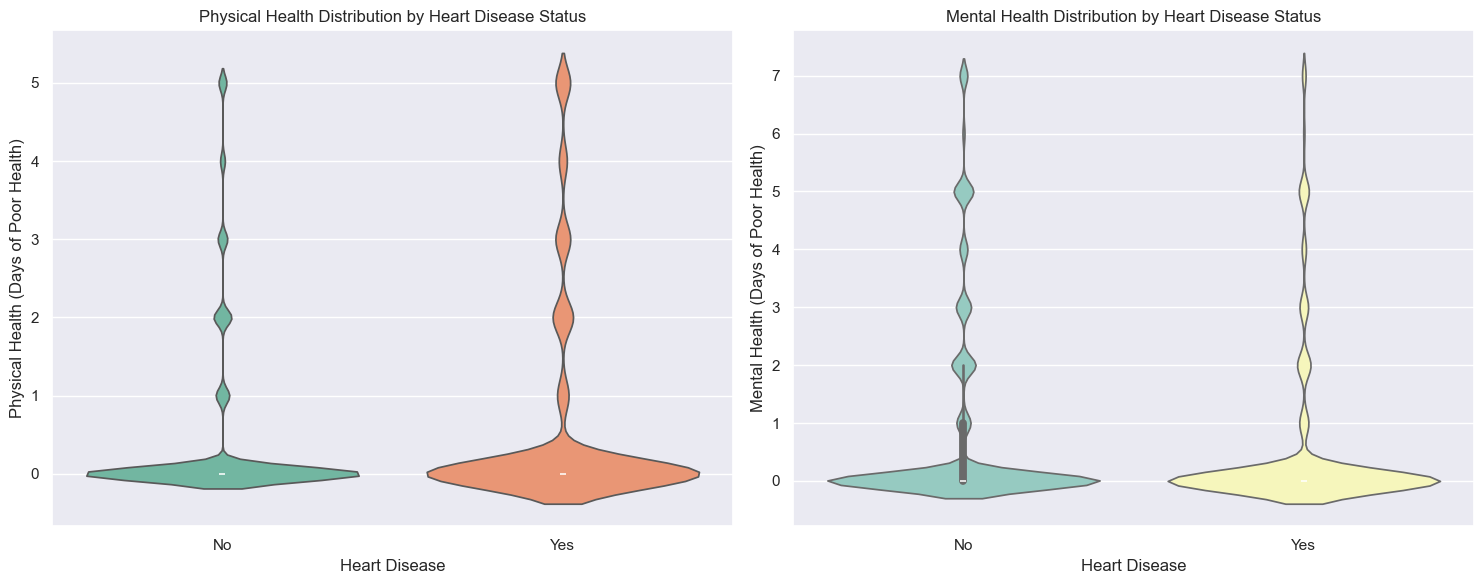

In [49]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.violinplot(x='HeartDisease', y='PhysicalHealth', data=df, palette='Set2')
plt.title('Physical Health Distribution by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Physical Health (Days of Poor Health)')


plt.subplot(1, 2, 2)
sns.violinplot(x='HeartDisease', y='MentalHealth', data=df, palette='Set3')
plt.title('Mental Health Distribution by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Mental Health (Days of Poor Health)')


plt.tight_layout()
plt.show()

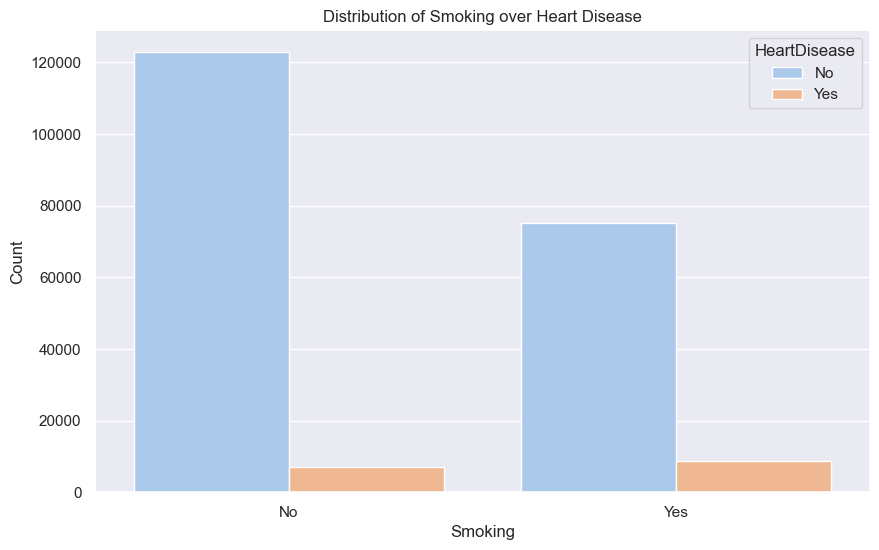

In [50]:
plt.figure(figsize=(10,6))
sns.countplot(x='Smoking',hue='HeartDisease',data =df,palette='pastel')
plt.title('Distribution of Smoking over Heart Disease')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.show()

In [51]:
df.corr(numeric_only=True)

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.036012,-0.025794,-0.053542
PhysicalHealth,0.036012,1.000000,0.123860,-0.026923
MentalHealth,-0.025794,0.123860,1.000000,-0.053419
SleepTime,-0.053542,-0.026923,-0.053419,1.000000


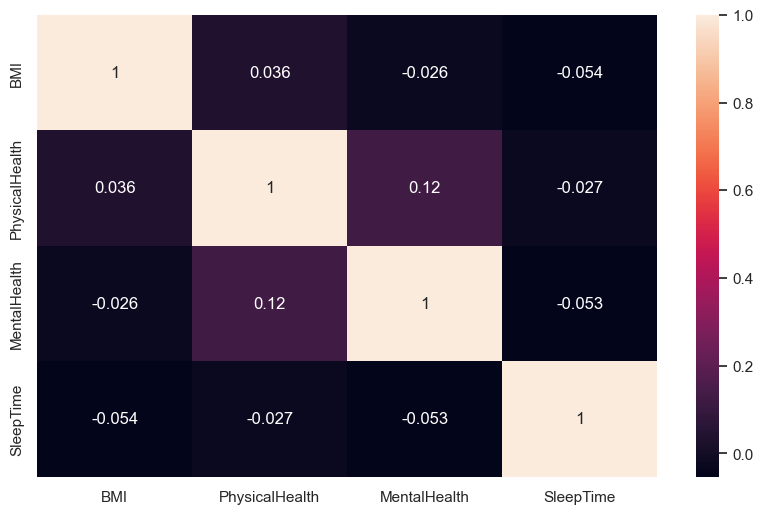

In [52]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [53]:
df.drop(columns=['BMI','Sex'],inplace=True)

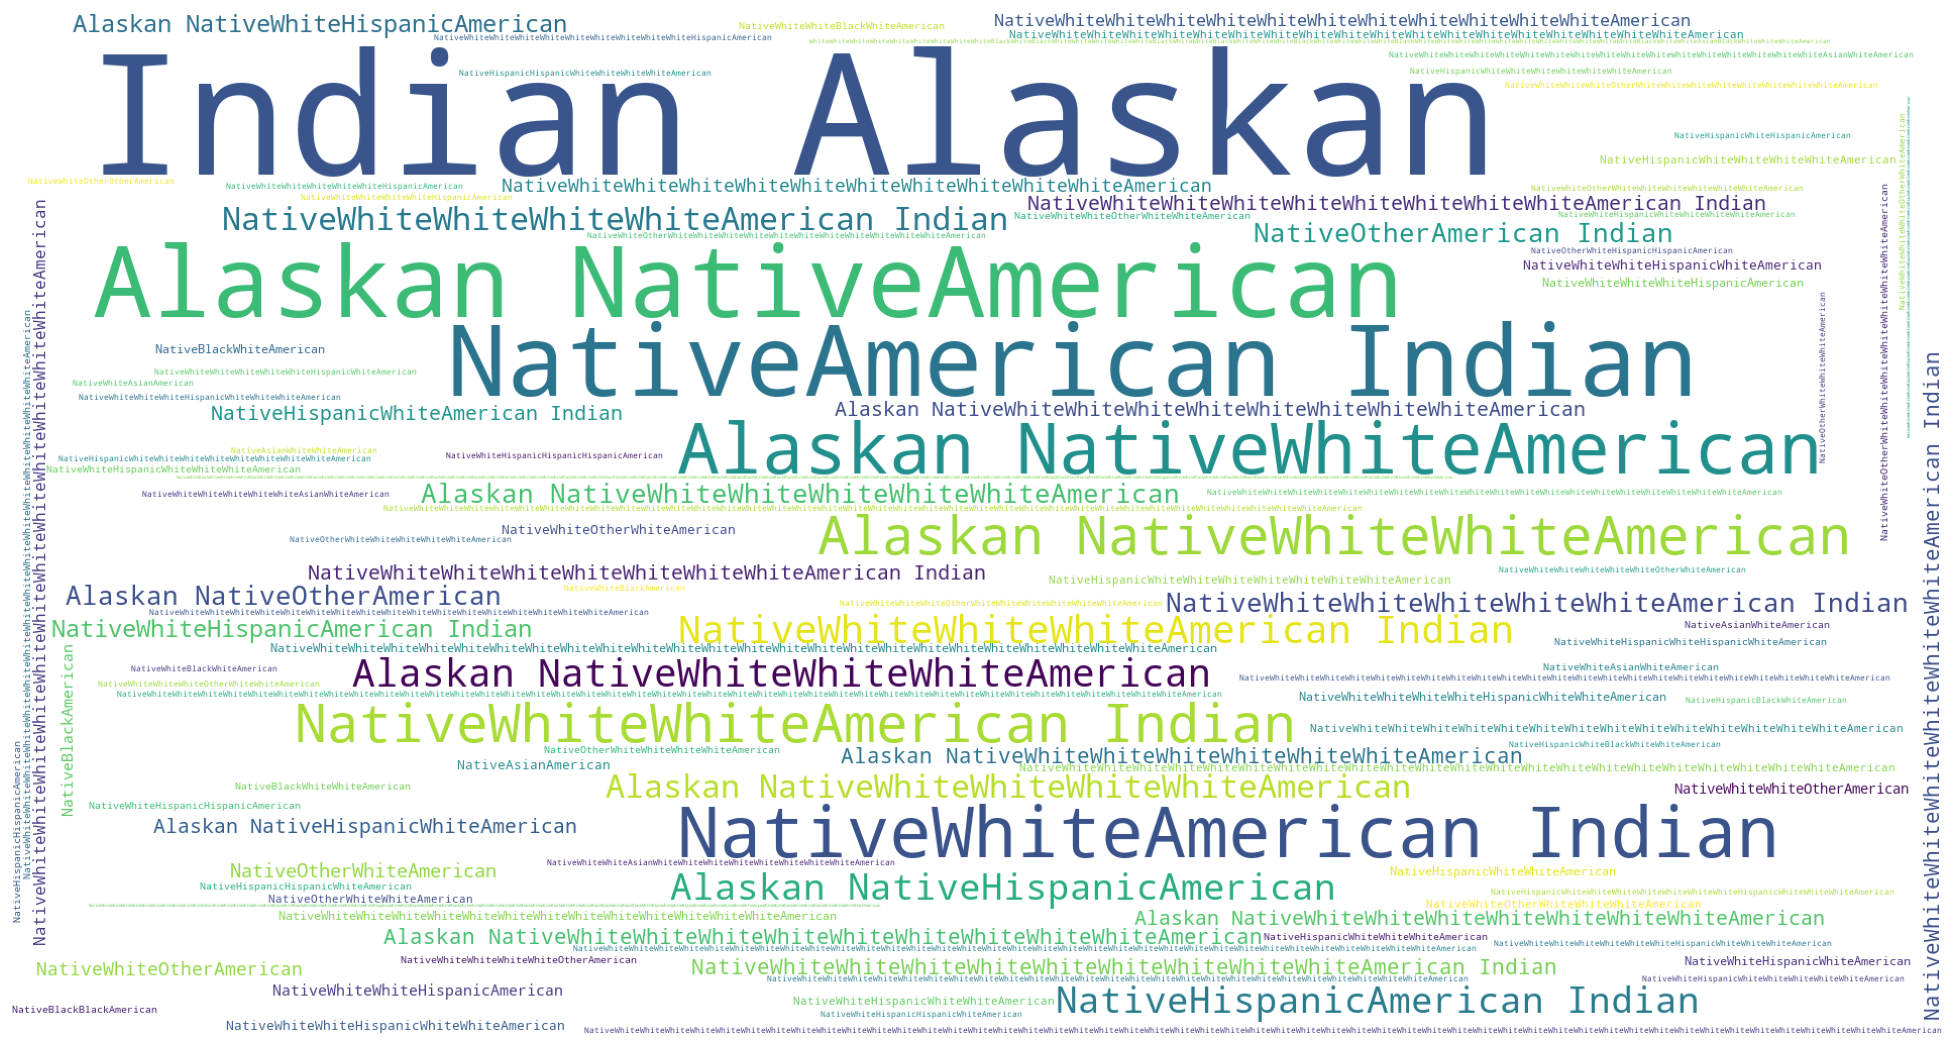

In [54]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
    background_color='white',
    width=1920,
    height=1020
    ).generate("".join(df.Race))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('Race.png')
plt.show()

In [55]:
df.SleepTime.describe()

count    213956.000000
mean          7.146362
std           1.150021
min           3.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          11.000000
Name: SleepTime, dtype: float64

In [56]:
df['PhysicalHealth'].value_counts()

PhysicalHealth
0.0    178992
2.0     11511
1.0      8577
3.0      6361
5.0      5320
4.0      3195
Name: count, dtype: int64

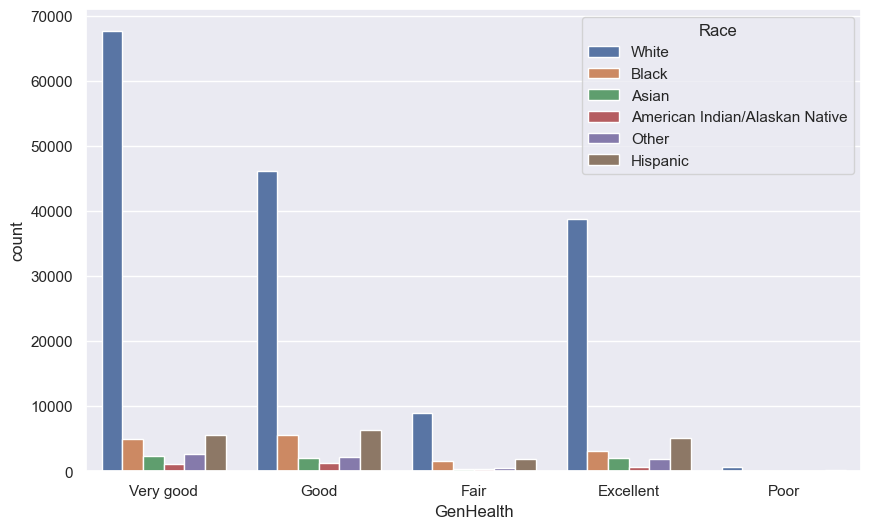

In [57]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'GenHealth', hue = 'Race')
plt.show()

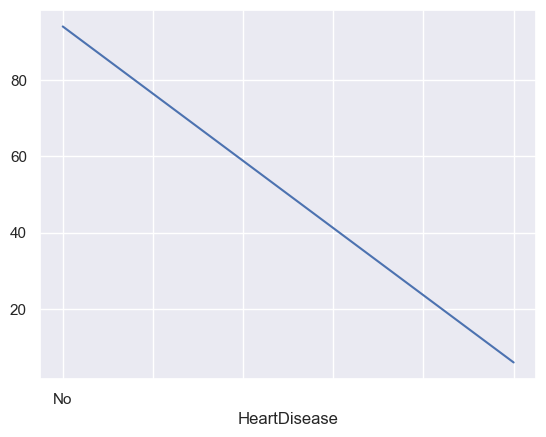

In [58]:
# Mental Health with top 100 individuals by Heart Disease
dfr=df.sort_values(by=['MentalHealth'], ascending=False).head(100)
dfr['HeartDisease'].value_counts().plot()
plt.show()

In [59]:
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [61]:
ordinal_cols = ['BMI_Category', 'AgeCategory', 'Race', 'GenHealth']
boolean_cols = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

ordinal_mappings = {
    'BMI_Category': ['Underweight', 'Normal weight', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III'],
    'AgeCategory': ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'],
    'Race': ['White', 'Black', 'Asian','Hispanic', 'American Indian/Alaskan Native', 'Other'],
    'GenHealth': ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']
}


preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=[ordinal_mappings[col] for col in ordinal_cols]), ordinal_cols),  # Ordinal encoding
        ('ohe', OneHotEncoder(drop='first'), boolean_cols)  # OneHotEncoding for boolean columns
    ],
    remainder='passthrough'  
)


df_transformed = preprocessor.fit_transform(df)

# Convert the transformed data back to a DataFrame with appropriate column names
# Ordinal columns retain original names, while OneHotEncoder generates new columns
ohe_columns = preprocessor.named_transformers_['ohe'].get_feature_names_out(boolean_cols)
final_columns = ordinal_cols + list(ohe_columns) + [col for col in df.columns if col not in ordinal_cols + boolean_cols]

df_encoded = pd.DataFrame(df_transformed, columns=final_columns)

In [62]:
df_encoded.head()

,BMI_Category,AgeCategory,Race,GenHealth,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes,PhysicalHealth,MentalHealth,SleepTime
0,1.0,12.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0
1,1.0,11.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0
2,3.0,12.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,5.0,0.0,9.0
3,2.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0
4,5.0,9.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10.0


In [63]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213956 entries, 0 to 213955
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   BMI_Category          213956 non-null  float64
 1   AgeCategory           213956 non-null  float64
 2   Race                  213956 non-null  float64
 3   GenHealth             213956 non-null  float64
 4   HeartDisease_Yes      213956 non-null  float64
 5   Smoking_Yes           213956 non-null  float64
 6   AlcoholDrinking_Yes   213956 non-null  float64
 7   Stroke_Yes            213956 non-null  float64
 8   DiffWalking_Yes       213956 non-null  float64
 9   Diabetic_Yes          213956 non-null  float64
 10  PhysicalActivity_Yes  213956 non-null  float64
 11  Asthma_Yes            213956 non-null  float64
 12  KidneyDisease_Yes     213956 non-null  float64
 13  SkinCancer_Yes        213956 non-null  float64
 14  PhysicalHealth        213956 non-null  float64
 15  

In [64]:
X = df_encoded.drop('HeartDisease_Yes', axis=1)
y = df_encoded['HeartDisease_Yes']

In [65]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_scaled= scale.fit_transform(X)

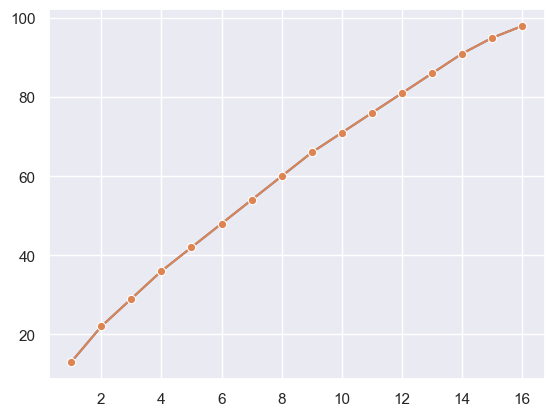

In [67]:
from sklearn.decomposition import PCA
decom = PCA(svd_solver='auto') 
X_pca = decom.fit_transform(X_scaled)
ex_var = np.cumsum(np.round(decom.explained_variance_ratio_, 2) * 100)
sns.lineplot(y=ex_var, x=np.arange(1, len(ex_var) + 1), marker='o')
plt.show()

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [69]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

In [70]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Generate confusion matrix and classification report
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # Display the results
    print(f'{model_name} Accuracy: {accuracy:.2f}')
    print(f'{model_name} Classification Report:\n{class_report}')
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Heart Disease', 'Heart Disease'])
    disp.plot()
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()
    
    return accuracy

In [71]:
log_reg = LogisticRegression()
log_reg.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

Logistic Regression Accuracy: 0.74
Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84     39617
         1.0       0.19      0.74      0.30      3175

    accuracy                           0.74     42792
   macro avg       0.58      0.74      0.57     42792
weighted avg       0.91      0.74      0.80     42792



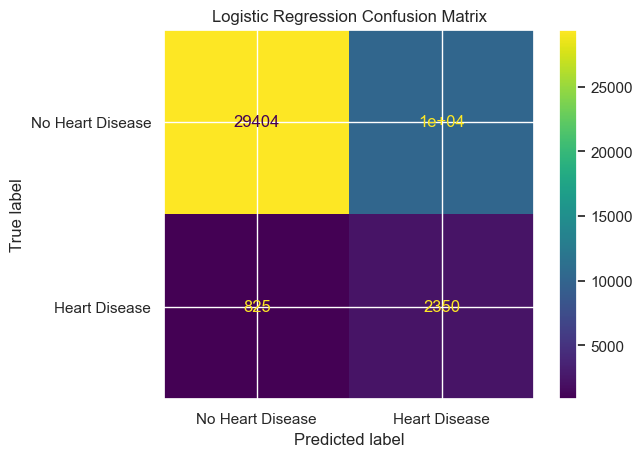

0.7420545896429239

In [72]:
log_reg_accuracy =evaluate_model(log_reg, X_test, y_test, 'Logistic Regression')
log_reg_accuracy

In [73]:
rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

Random Forest Classifier Accuracy: 0.88
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93     39617
         1.0       0.26      0.34      0.29      3175

    accuracy                           0.88     42792
   macro avg       0.60      0.63      0.61     42792
weighted avg       0.89      0.88      0.89     42792



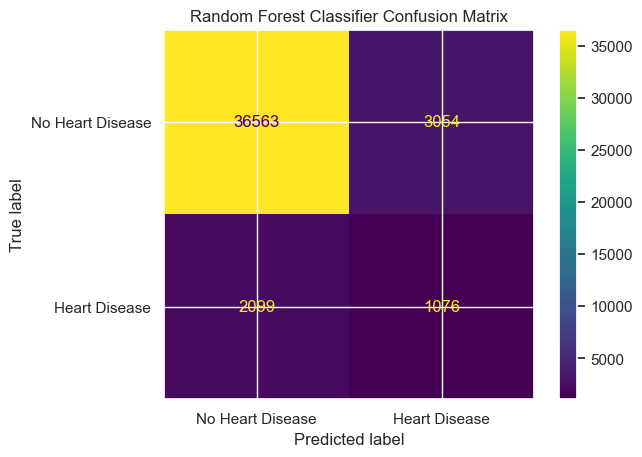

0.8795802953823144

In [74]:
rf_accuracy= evaluate_model(rf, X_test, y_test, 'Random Forest Classifier')
rf_accuracy

In [75]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier()

Gradient Boosting Classifier Accuracy: 0.85
Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92     39617
         1.0       0.25      0.50      0.33      3175

    accuracy                           0.85     42792
   macro avg       0.60      0.69      0.62     42792
weighted avg       0.90      0.85      0.87     42792



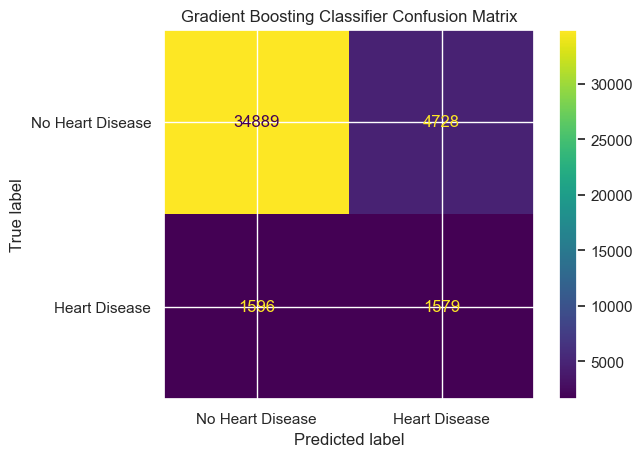

0.8522153673583848

In [76]:
gbc_accuracy = evaluate_model(gbc, X_test, y_test, 'Gradient Boosting Classifier')
gbc_accuracy

In [77]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [79]:
import xgboost as xgb
xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

xgboost_model.fit(X_train_resampled, y_train_resampled)

C:\Users\nanaf\Downloads\Anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:55:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

XGBoost Classifier Accuracy: 0.90
XGBoost Classifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95     39617
         1.0       0.31      0.29      0.30      3175

    accuracy                           0.90     42792
   macro avg       0.62      0.62      0.62     42792
weighted avg       0.90      0.90      0.90     42792



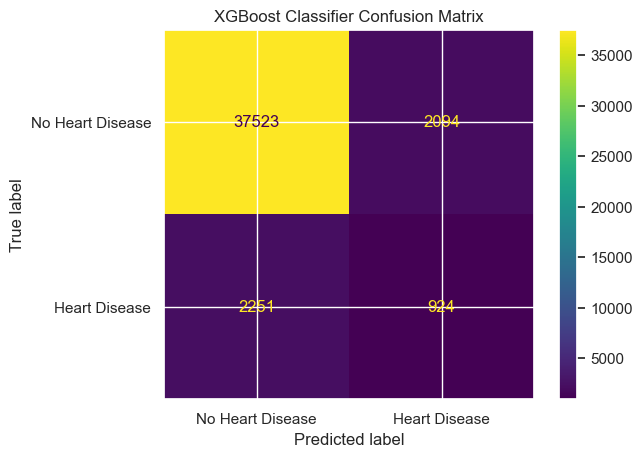

XGBoost Classifier Accuracy: 0.8984623294073658


In [81]:
xgboost_accuracy = evaluate_model(xgboost_model, X_test, y_test, 'XGBoost Classifier')
print(f'XGBoost Classifier Accuracy: {xgboost_accuracy}')

In [82]:
pip install lightgbm

In [83]:
import lightgbm as lgb

lgbm_params = {
    'subsample': 0.95, 
    'reg_lambda': 0.005623413251903491, 
    'reg_alpha': 1.0, 
    'num_leaves': 570, 
    'n_estimators': 550, 
    'min_data_in_leaf': 135, 
    'min_child_weight': 0.02, 
    'max_depth': 13, 
    'learning_rate': 0.015, 
    'feature_fraction': 0.85, 
    'colsample_bytree': 0.9, 
    'cat_smooth': 50, 
    'bagging_freq': 9, 
    'bagging_fraction': 0.85
}

lightgbm_model = lgb.LGBMClassifier(**lgbm_params, random_state=42, verbose=-1)
lightgbm_model.fit(X_train_resampled, y_train_resampled)

LGBMClassifier(bagging_fraction=0.85, bagging_freq=9, cat_smooth=50,
               colsample_bytree=0.9, feature_fraction=0.85, learning_rate=0.015,
               max_depth=13, min_child_weight=0.02, min_data_in_leaf=135,
               n_estimators=550, num_leaves=570, random_state=42, reg_alpha=1.0,
               reg_lambda=0.005623413251903491, subsample=0.95, verbose=-1)

LightGBM Classifier Accuracy: 0.90
LightGBM Classifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94     39617
         1.0       0.30      0.31      0.30      3175

    accuracy                           0.90     42792
   macro avg       0.62      0.62      0.62     42792
weighted avg       0.90      0.90      0.90     42792



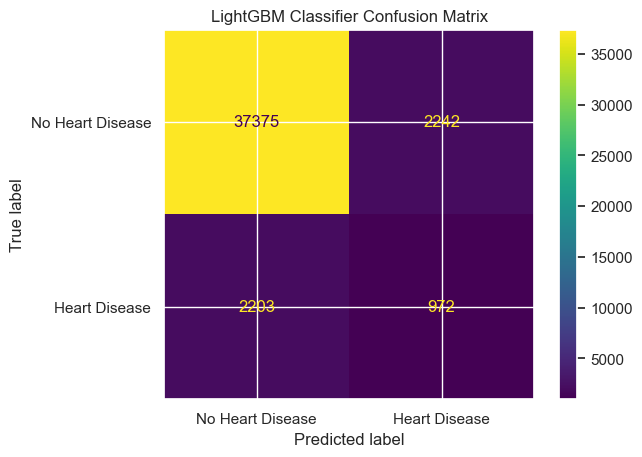

LightGBM Classifier Accuracy: 0.8961254440082258


In [84]:
lightgbm_accuracy = evaluate_model(lightgbm_model, X_test, y_test, 'LightGBM Classifier')
print(f'LightGBM Classifier Accuracy: {lightgbm_accuracy}')

In [94]:
algorithms = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost Classifier','LightGBM Classifier']
accuracies = [log_reg_accuracy,rf_accuracy, gbc_accuracy,xgboost_accuracy,lightgbm_accuracy ]

results_df = pd.DataFrame({'Algorithms': algorithms, 'Accuracies': accuracies})


results_df

,Algorithms,Accuracies
0,Logistic Regression,0.742055
1,Random Forest,0.879931
2,Gradient Boosting,0.852215
3,XGBoost Classifier,0.898462
4,LightGBM Classifier,0.896125
